# Спецкурс по ML (3 день)
## Штыков Павел (@ShtykovPavel)

In [49]:
!gdown --id 18DZtYN-JvEKhkRtnca6BTuKtzun4mhsB


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18DZtYN-JvEKhkRtnca6BTuKtzun4mhsB
To: /content/cars.csv
100% 568k/568k [00:00<00:00, 46.6MB/s]


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

In [51]:
df = pd.read_csv("cars.csv")

In [52]:
df.head()

,Unnamed: 0,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,Seating Capacity,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,price,currency,Country
0,0,1.2,3,0,42.0,4.9,0,76,100.0,0,170,5,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
1,1,1.2,3,0,42.0,4.9,0,76,100.0,0,170,5,14.0,4.245,1.670,1.515,2.550,450.0,Mitsubishi Attrage 2021 1.2 GLX (Base),34099.0,0,0
2,2,1.4,4,0,45.0,6.3,0,75,118.0,1,156,2,16.0,3.864,1.716,1.721,2.513,2800.0,Fiat Fiorino 2021 1.4L Standard,41250.0,0,0
3,3,1.6,4,0,50.0,6.4,0,102,145.0,0,180,5,11.0,4.354,1.994,1.529,2.635,510.0,Renault Symbol 2021 1.6L PE,44930.0,0,0
4,4,1.5,4,0,48.0,5.8,0,112,150.0,0,170,5,10.9,4.314,1.809,1.624,2.585,448.0,MG ZS 2021 1.5L STD,57787.0,0,0


In [53]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3420, 21), (1140, 21), (3420,), (1140,))

In [19]:
y_train

793      35000.0
3318      7499.0
3777     25000.0
4602     33000.0
153     112355.0
          ...   
2275     12995.0
2460     18500.0
4505     24400.0
2382     16500.0
816      46500.0
Name: price, Length: 3420, dtype: float64

In [21]:
X_train.head()

,Engine Capacity,Cylinders,Drive Type,Fuel Tank Capacity,Fuel Economy,Fuel Type,Horsepower,Torque,Transmission,Top Speed,Seating Capacity,Acceleration,Length,Width,Height,Wheelbase,Trunk Capacity,name,currency,Country
793,1.5,4,0,42.0,6.8,0,107,140.0,0,175,5,13.0,4.450,1.748,1.493,2.570,502.0,Chery Arrizo 3 2021 1.5L Baisc,1,1
3318,2.5,4,0,61.3,6.3,0,188,244.0,2,220,5,8.0,4.869,1.850,1.440,2.825,517.0,Nissan Altima 2021 2.5 SV,3,3
3777,5.7,8,1,138.0,15.7,0,362,530.0,0,220,8,7.0,5.095,1.980,1.930,2.850,456.0,Toyota Land Cruiser 2021 5.7L EXR,3,3
4602,4.6,8,2,84.0,12.3,0,382,493.0,0,250,5,6.5,5.090,1.875,1.465,2.970,510.0,Lexus LS 2021 460 Premier (SWB),4,4
153,2.7,4,2,80.0,11.1,0,164,245.0,1,165,5,11.5,5.335,1.815,1.815,3.090,900.0,Toyota Hilux 2021 2.7L GLX 2 Double Cab M/T (4x2),0,0


In [23]:
y_test.mean(), y_test.max(), y_test.min()

(139442.1956140351, 2255000.0, 2899.0)

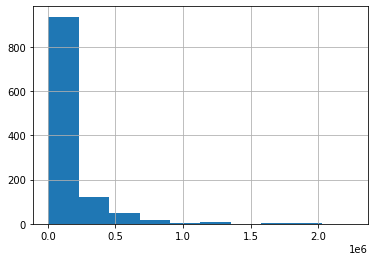

In [25]:
y_test.hist()

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3420 entries, 793 to 816
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Engine Capacity     3420 non-null   float64
 1   Cylinders           3420 non-null   int64  
 2   Drive Type          3420 non-null   int64  
 3   Fuel Tank Capacity  3420 non-null   float64
 4   Fuel Economy        3420 non-null   float64
 5   Fuel Type           3420 non-null   int64  
 6   Horsepower          3420 non-null   int64  
 7   Torque              3420 non-null   float64
 8   Transmission        3420 non-null   int64  
 9   Top Speed           3420 non-null   int64  
 10  Seating Capacity    3420 non-null   int64  
 11  Acceleration        3420 non-null   float64
 12  Length              3420 non-null   float64
 13  Width               3420 non-null   float64
 14  Height              3420 non-null   float64
 15  Wheelbase           3420 non-null   float64
 16  Trunk

In [26]:
X_train = X_train.drop("name", axis=1)
X_test = X_test.drop("name", axis=1)

In [35]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE = ", mean_squared_error(y_pred, y_test, squared=False))

RMSE =  183954.93834940906


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [30]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE = ", mean_squared_error(y_pred, y_test, squared=False))

RMSE =  261137.2077548861


In [37]:
model = RandomForestRegressor(n_estimators=50)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE = ", mean_squared_error(y_pred, y_test, squared=False))

RMSE =  251062.6255359451


In [34]:
model = GradientBoostingRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE = ", mean_squared_error(y_pred, y_test, squared=False))

RMSE =  231851.23611821776
